In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:

home = os.path.expanduser("~")

# Build the path dynamically
file_path = os.path.join(home, "Downloads", "data.csv")

# Read the file with error handling
try:
    df = pd.read_csv(file_path)
    print("File loaded successfully! ")
    print(df.head())
except FileNotFoundError:
    print(f" File not found at: {file_path}")
except Exception as e:
    print(f"Something went wrong: {e}")

File loaded successfully! 
          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707            

In [3]:
df = pd.DataFrame(df)
print(df.head())

          Income  Age  Dependents     Occupation City_Tier          Rent  \
0   44637.249636   49           0  Self_Employed    Tier_1  13391.174891   
1   26858.596592   34           2        Retired    Tier_2   5371.719318   
2   50367.605084   35           1        Student    Tier_3   7555.140763   
3  101455.600247   21           0  Self_Employed    Tier_3  15218.340037   
4   24875.283548   52           4   Professional    Tier_2   4975.056710   

   Loan_Repayment    Insurance     Groceries    Transport  ...  \
0        0.000000  2206.490129   6658.768341  2636.970696  ...   
1        0.000000   869.522617   2818.444460  1543.018778  ...   
2     4612.103386  2201.800050   6313.222081  3221.396403  ...   
3     6809.441427  4889.418087  14690.149363  7106.130005  ...   
4     3112.609398   635.907170   3034.329665  1276.155163  ...   

   Desired_Savings  Disposable_Income  Potential_Savings_Groceries  \
0      6200.537192       11265.627707                  1685.696222   
1     

In [4]:
# data  inspection

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Income                           20000 non-null  float64
 1   Age                              20000 non-null  int64  
 2   Dependents                       20000 non-null  int64  
 3   Occupation                       20000 non-null  object 
 4   City_Tier                        20000 non-null  object 
 5   Rent                             20000 non-null  float64
 6   Loan_Repayment                   20000 non-null  float64
 7   Insurance                        20000 non-null  float64
 8   Groceries                        20000 non-null  float64
 9   Transport                        20000 non-null  float64
 10  Eating_Out                       20000 non-null  float64
 11  Entertainment                    20000 non-null  float64
 12  Utilities         

In [6]:
df.isnull().sum()

Income                             0
Age                                0
Dependents                         0
Occupation                         0
City_Tier                          0
Rent                               0
Loan_Repayment                     0
Insurance                          0
Groceries                          0
Transport                          0
Eating_Out                         0
Entertainment                      0
Utilities                          0
Healthcare                         0
Education                          0
Miscellaneous                      0
Desired_Savings_Percentage         0
Desired_Savings                    0
Disposable_Income                  0
Potential_Savings_Groceries        0
Potential_Savings_Transport        0
Potential_Savings_Eating_Out       0
Potential_Savings_Entertainment    0
Potential_Savings_Utilities        0
Potential_Savings_Healthcare       0
Potential_Savings_Education        0
Potential_Savings_Miscellaneous    0
d

In [7]:
# summary statistics
print(df.describe())

             Income           Age    Dependents           Rent  \
count  2.000000e+04  20000.000000  20000.000000   20000.000000   
mean   4.158550e+04     41.031450      1.995950    9115.494629   
std    4.001454e+04     13.578725      1.417616    9254.228188   
min    1.301187e+03     18.000000      0.000000     235.365692   
25%    1.760488e+04     29.000000      1.000000    3649.422246   
50%    3.018538e+04     41.000000      2.000000    6402.751824   
75%    5.176545e+04     53.000000      3.000000   11263.940492   
max    1.079728e+06     64.000000      4.000000  215945.674703   

       Loan_Repayment     Insurance      Groceries     Transport  \
count    20000.000000  20000.000000   20000.000000  20000.000000   
mean      2049.800292   1455.028761    5205.667493   2704.466685   
std       4281.789941   1492.938435    5035.953689   2666.345648   
min          0.000000     30.002012     154.078240     81.228584   
25%          0.000000    580.204749    2165.426419   1124.578012 

In [8]:
 # feature engineering 

In [9]:
expense_cols = ["Rent","Loan_Repayment","Insurance","Groceries","Transport",
                "Eating_Out","Entertainment","Utilities"]

# Total expenses and saving
df["Total_Expenses"] = df[expense_cols].sum(axis=1)
df["Savings"] = df["Income"] - df["Total_Expenses"]

#Avoid divide-by-zero
df["Savings_Rate"] = np.where(df["Income"] > 0, df["Savings"] / df["Income"], np.nan)
df["Essential_Expenses"] = df[["Rent","Utilities","Insurance","Loan_Repayment"]].sum(axis=1)
df["Discretionary_Expenses"] = df[["Groceries","Eating_Out","Entertainment","Transport"]].sum(axis=1)
df["Discretionary_Rate"] = np.where(df["Income"] > 0, df["Discretionary_Expenses"]/df["Income"], np.nan)

# POTENTIAL SAVINGS
df["Total_potentialsavings"] = df[["Potential_Savings_Groceries","Potential_Savings_Transport","Potential_Savings_Eating_Out","Potential_Savings_Entertainment"    
,"Potential_Savings_Utilities","Potential_Savings_Healthcare","Potential_Savings_Education","Potential_Savings_Miscellaneous"]].sum(axis=1)


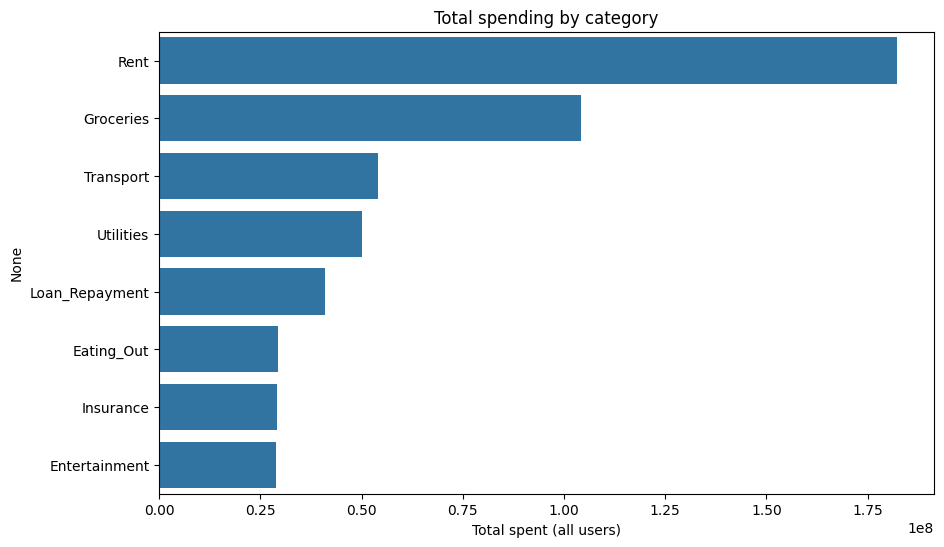

In [10]:
# Aggregate across population
cat_totals = df[expense_cols].sum().sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=cat_totals.values, y=cat_totals.index)
plt.xlabel("Total spent (all users)")
plt.title("Total spending by category")
plt.show()

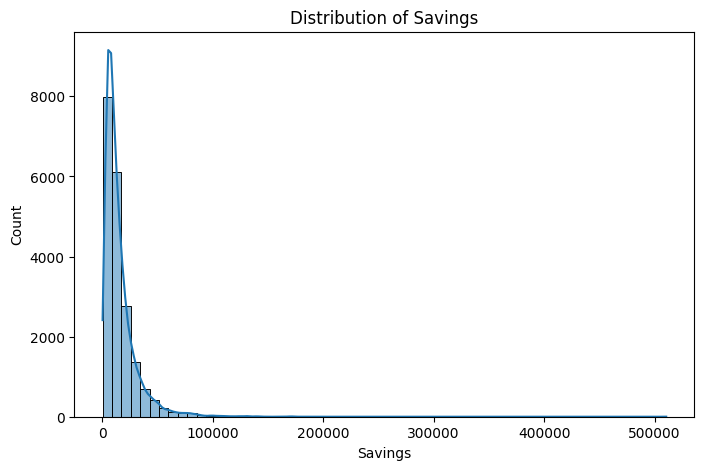

In [11]:
# savings distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Savings"].dropna(), bins=60, kde=True)
plt.title("Distribution of Savings")
plt.show()

In [12]:
# SPENDING BY CITY TIER OR OCCUPATION

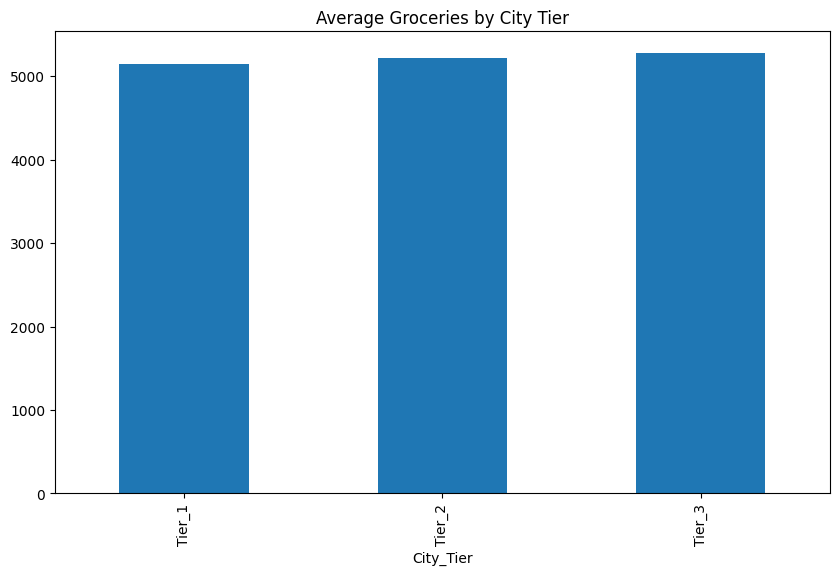

In [13]:
plt.figure(figsize=(10,6))
agg = df.groupby("City_Tier")[expense_cols].mean()  # or median
agg["Groceries"].plot(kind="bar")
plt.title("Average Groceries by City Tier")
plt.show()


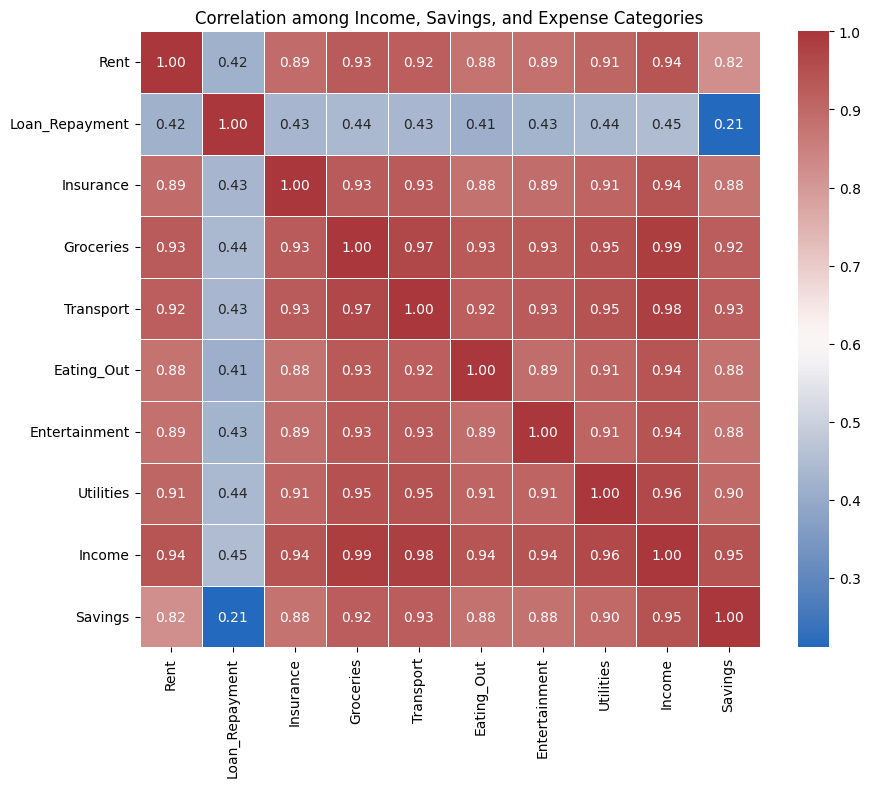

In [14]:
# correlation heatmap
# Select the relevant columns: expenses + Income + Savings
cols_to_plot = expense_cols + ["Income", "Savings"]

# Compute the correlation matrix
corr_matrix = df[cols_to_plot].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", linewidths=0.5)
plt.title("Correlation among Income, Savings, and Expense Categories")
plt.show()


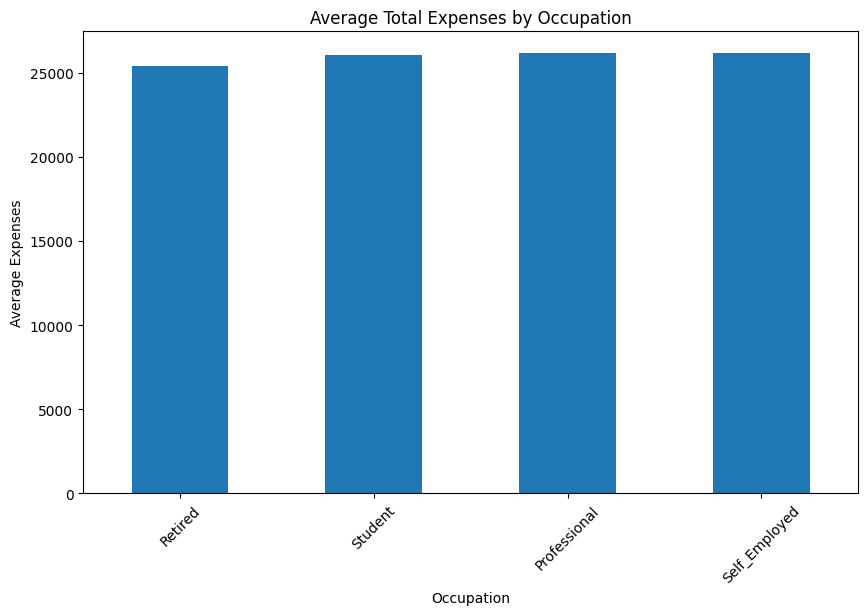

In [15]:
# average expenses occupation vs total expenses
plt.figure(figsize=(10,6))
df.groupby("Occupation")["Total_Expenses"].mean().sort_values().plot(kind="bar")
plt.title("Average Total Expenses by Occupation")
plt.ylabel("Average Expenses")
plt.xlabel("Occupation")
plt.xticks(rotation=45)
plt.show()


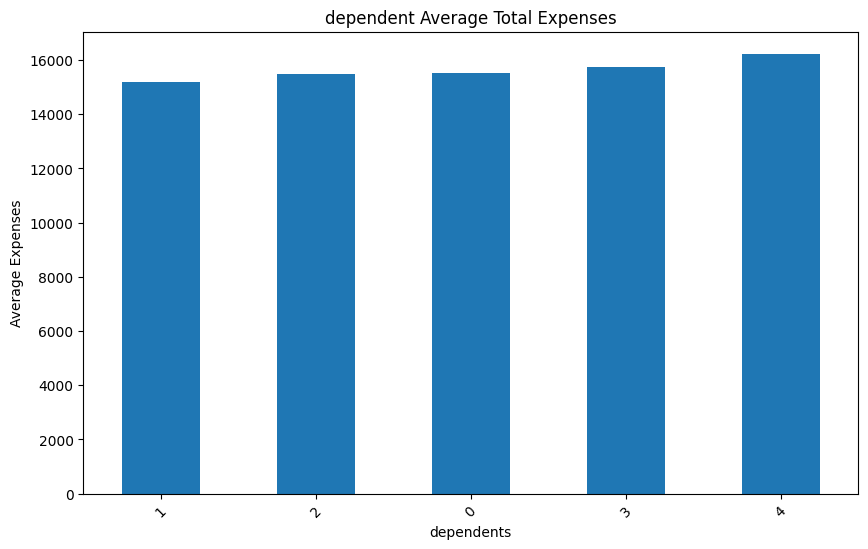

In [16]:
# dependents average spend
plt.figure(figsize=(10,6))
df.groupby("Dependents")["Savings"].mean().sort_values().plot(kind="bar")
plt.title("dependent Average Total Expenses")
plt.ylabel("Average Expenses")
plt.xlabel("dependents")
plt.xticks(rotation=45)
plt.show()


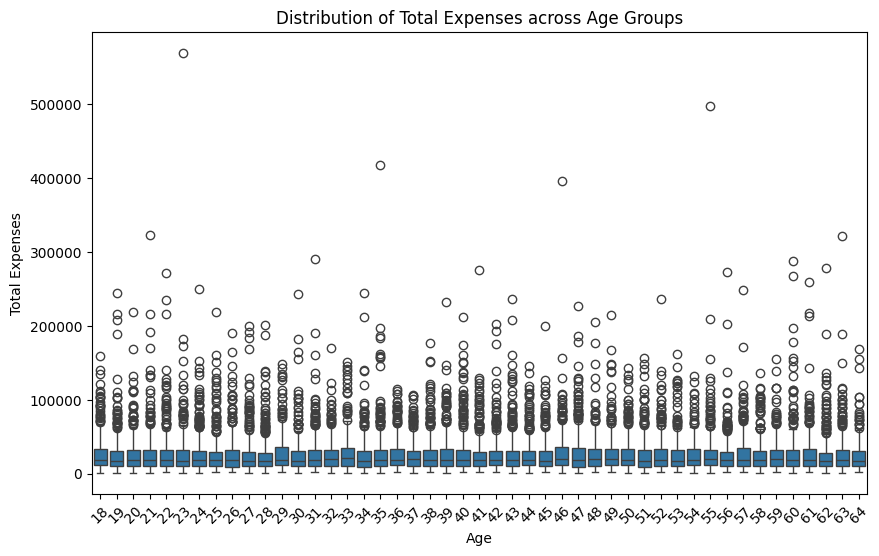

In [17]:
#Distribution of Total Expenses across Age Groups
plt.figure(figsize =(10, 6))
sns.boxplot(x="Age", y="Total_Expenses", data=df)
plt.title("Distribution of Total Expenses across Age Groups")
plt.xlabel("Age")
plt.ylabel("Total Expenses")
plt.xticks(rotation=45)
plt.show()

CLUSTERING USING KMEANS

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Select features for clustering
features = ["Income", "Total_Expenses", "Savings"]
cluster_data = df[features].dropna()  # drop missing values just in case

# Scale the data  for clustering
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

print("Scaled data shape:", cluster_scaled.shape)

Scaled data shape: (20000, 3)


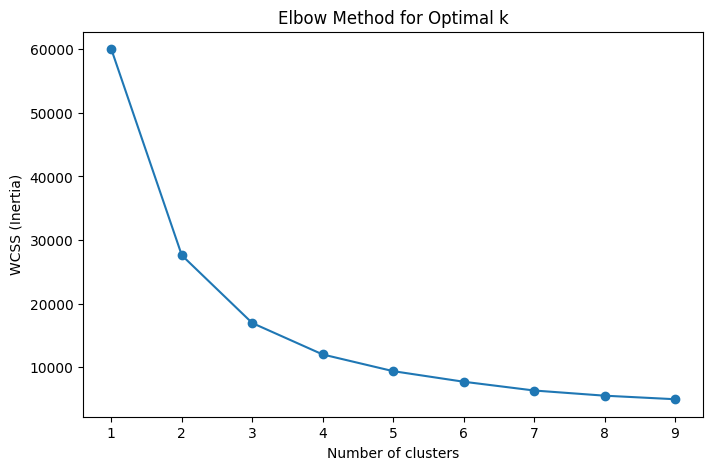

In [20]:
wcss = []  # within-cluster sum of squares (inertia)

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(range(1, 10), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [21]:
# Fit KMeans with chosen number of clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df["Cluster"] = kmeans.fit_predict(cluster_scaled)

In [22]:
cluster_summary = df.groupby("Cluster")[features].mean().round(2)
print(cluster_summary)


            Income  Total_Expenses   Savings
Cluster                                     
0         76839.49        47817.28  29022.21
1        196559.48       121228.54  75330.94
2         24617.91        15453.83   9164.07


CATEGORIZE CLUSTERS INTO CLUSTER LABELS

In [24]:
# Map cluster numbers to descriptive labels
cluster_means = df.groupby("Cluster")[["Income", "Total_Expenses", "Savings"]].mean()

# Sort clusters by Income
sorted_clusters = cluster_means.sort_values("Income").index

# Create a mapping 
cluster_labels = {
    sorted_clusters[0]: "middle Income & Low Savers",
    sorted_clusters[1]: "high Income & Balanced",
    sorted_clusters[2]: "low Income & High Spenders"
}

#  Apply mapping to dataset
df["Cluster_Label"] = df["Cluster"].map(cluster_labels)

print(df[["Income", "Total_Expenses", "Savings", "Cluster", "Cluster_Label"]].head())


          Income  Total_Expenses       Savings  Cluster  \
0   44637.249636    30993.182269  13644.067366        2   
1   26858.596592    13928.468360  12930.128232        2   
2   50367.605084    30509.241093  19858.363991        2   
3  101455.600247    62740.472703  38715.127544        0   
4   24875.283548    15479.761206   9395.522342        2   

                Cluster_Label  
0  middle Income & Low Savers  
1  middle Income & Low Savers  
2  middle Income & Low Savers  
3      high Income & Balanced  
4  middle Income & Low Savers  


In [25]:
df["Cluster_Label"].value_counts()

Cluster_Label
middle Income & Low Savers    14852
high Income & Balanced         4559
low Income & High Spenders      589
Name: count, dtype: int64

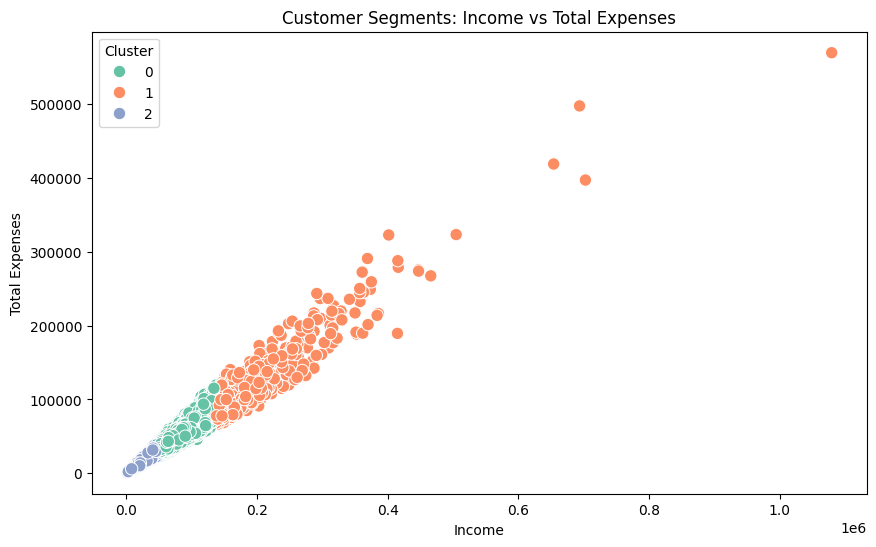

In [26]:
# scatterplot of income vs expenses , colored by cluster
plt.figure(figsize=(10,6))
sns.scatterplot(x="Income", y="Total_Expenses", hue="Cluster", data=df, palette="Set2", s=80)
plt.title("Customer Segments: Income vs Total Expenses")
plt.xlabel("Income")
plt.ylabel("Total Expenses")
plt.show()


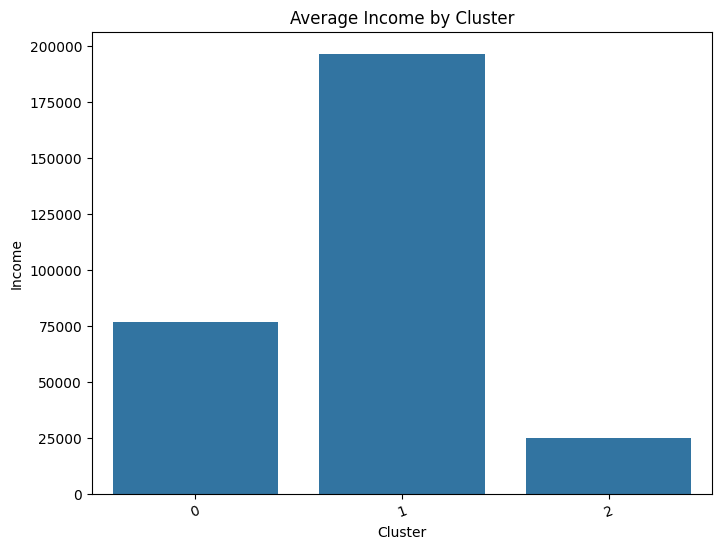

In [53]:
# Visualize Cluster Patterns (income)
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_summary.index, y="Income", data=cluster_summary.reset_index())
plt.title("Average Income by Cluster")
plt.xticks(rotation=20)
plt.show()


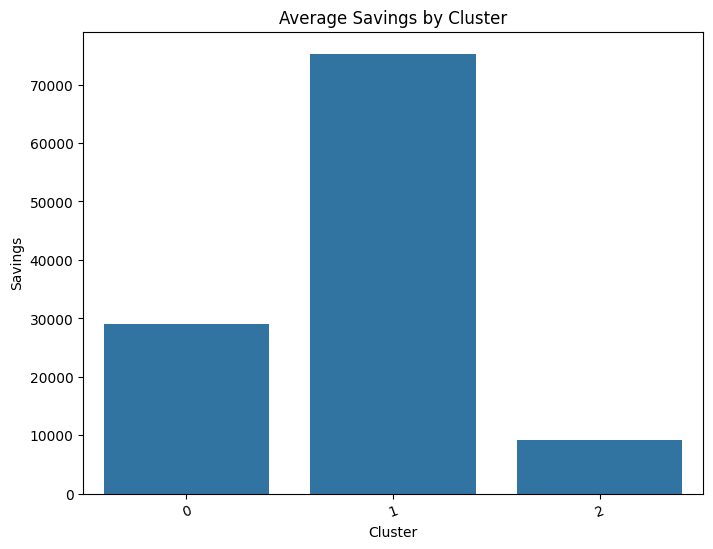

In [55]:
# cluster patterns by income and savings 
plt.figure(figsize=(8,6))
sns.barplot(x=cluster_summary.index, y="Savings", data=cluster_summary.reset_index())
plt.title("Average Savings by Cluster")
plt.xticks(rotation=20)
plt.show()


In [69]:
# Automatically describe key insights
for cluster, row in cluster_summary.iterrows():
    savings_rate = row["Savings"] / row["Income"]

    print(f"\nCluster: {cluster}")
    print(f"- Average Income: ${row['Income']:.2f}")
    print(f"- Average Expenses: ${row['Total_Expenses']:.2f}")
    print(f"- Average Savings: ${row['Savings']:.2f}")
    print(f"- Savings Rate: {savings_rate:.2%}")

    #  thresholds for insight
    if savings_rate < 0.20:
        print(" Insight: Low savings rate — potential overspending or insufficient income.")
    elif 0.20 <= savings_rate <= 0.35:
        print("Insight: Moderate savings rate — balanced lifestyle.")
    else:
        print(" Insight: High savings rate — strong financial discipline.")




Cluster: 0
- Average Income: $76839.49
- Average Expenses: $47817.28
- Average Savings: $29022.21
- Savings Rate: 37.77%
 Insight: High savings rate — strong financial discipline.

Cluster: 1
- Average Income: $196559.48
- Average Expenses: $121228.54
- Average Savings: $75330.94
- Savings Rate: 38.32%
 Insight: High savings rate — strong financial discipline.

Cluster: 2
- Average Income: $24617.91
- Average Expenses: $15453.83
- Average Savings: $9164.07
- Savings Rate: 37.23%
 Insight: High savings rate — strong financial discipline.
